# 09 - 1 순차 데이터와 순환 신경망을 배운다

## 순차 데이터를 소개

* 우리가 다루는 데이터 중에는 독립적이지 않고 샘플이 서로 연관되어 있는 경우가 많다. (ex. 날씨, 파장 등등...) -> 이러한 일정한 시간 간격으로 배치된 데이터를 **시계열(time series)** 데이터 라고 부른다.
* 시계열 데이터를 포함하여 샘플에 순서가 있는 데이터를 일반적으로 순차 데이터(sequential data)라고 부른다. -> 이때 모델에서 순차 데이터를 처리하는 각 단계를 타임 스템(time step)이라고 부른다.

## 순환 신경망을 소개

말 그대로 뉴런의 출력이 순환되는 신경망

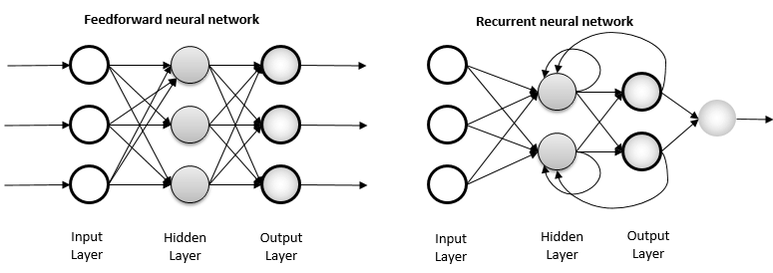

은닉틍의 출력이 다시 은닉층의 입력으로 사용된다!!

이것을 순환 구조라고 부른다. 그리고 순환 구조가 있는 층을 순환층 이라고 한다.

그에 따른 효과는 ?
 * 이전 샘플의 정보를 현재 샘플을 처리할 때 참조할 수 있다.

### 순환 신경망은 뉴런을 셀 이라고 한다

층이나 뉴런을 셀(cell)이라고 부른다. 각 뉴런마다 순환 구조를 표현하기 번거로워서 셀 하나에 순환 구조를 나타내는 경우가 많음.

하지만 실제로는 여러개의 뉴런을 사용하는 것이므로 오해 X

순환 신경망에서는 셀의 출력을 은닉 상태(hidden state)라고 부른다.

순환층의 셀에서 입력과 이전 타임 스텝의 은닉 상태를 통해 어떤 계산이 이루어질까?

* 지금까지의 정방향 계산과 비슷하지만, 이전 타임 스텝의 은닉 상태와 곱하는 가중치가 하나 더 있다는 점이 다르다.
* 순환 신경망의 셀에서는 활성화 함수로는 하이퍼볼릭 탄젠트(hyperbolic tangent) 함수를 많이 사용한다.

## 순환 신경망의 정방향 계산을 알아보자

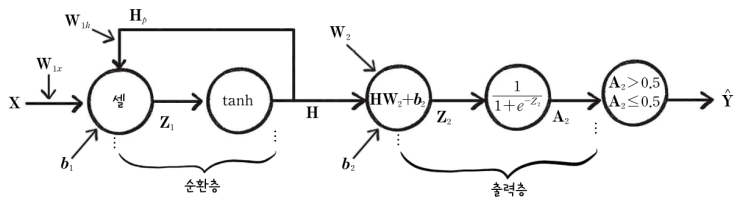

순환층의 정방향 계산<br>
$Z_1 = XW_{1x}+H_pW_{1h}+b_1$ <br>
$H=tanh(Z_1)$

--------
출력층의 정방향 계산<br>
$Z_2=HW_2+B_2$ <br>
$A_2 = sigmoid(Z_2)$

타임 스텝을 포함한 입력 데이터의 차원에 대해서도 자세히 알아보자.

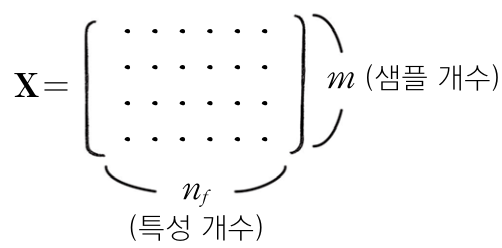

입력에 곱해지는 가중치 $W_{1x}$의 크기는($n_f, n_c$)이다. $n_c$ 순환층에 있는 셀의 개수이다.

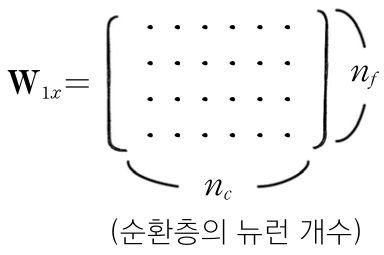

$X$와 $W_{1x}$의 점 곱 연산을 적용한 크기는 ($m,n_c$)이다

$Z_1,H,H_p$의 크기 모두($m,n_c$)이다. 따라서 H_p에 가중치 W_1h가 곱해진 결과도(m, n_c)크기를 가져야 하므로, W_1h의 크기는(n_c, n_c)임을 알 수 있다.

이번엔 출력층을 보자.

출력층 결과의 크기는 (m, n_classes)가 되어야 한다. 그리고 출력층의 입력으로 사용되는 H의 크기는 (m,n_c)이다. 가중치 W_2의 크기는 (n_c, n_classes)이다. 이에 따라 선형 출력과 활성화 출력인 Z_2, A_2의 크기는 (m, n_clasees)이다.

절편의 경우, 각 층의 누런마다 하나씩의 절편이 필요하므로 b_1의 크기는 (n_c)이고, b_2의 크기는 (n_classes)이다.

## 순환 신경망의 역방향 계산

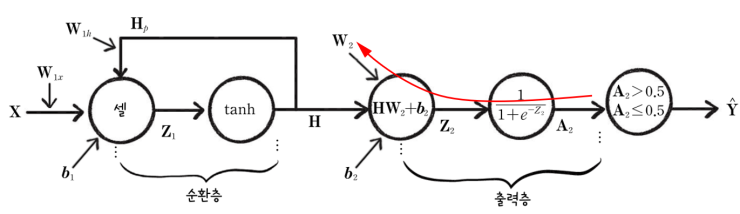

$\frac{\partial \mathbf{L}}{\partial \mathbf{W}_2} = \frac{\partial \mathbf{L}}{\partial\mathbf{Z}_2}\frac{\partial \mathbf{Z}_2}{\partial\mathbf{W}_2} = \mathbf{H}^\mathrm{T}(-(\mathbf{Y-A}_2))$

<br>

$\frac{\partial \mathbf{L}}{\partial \pmb{b}_2} = \frac{\partial \mathbf{L}}{\partial\mathbf{Z}_2}\frac{\partial \mathbf{Z}_2}{\partial\pmb{b}_2} = \mathbf{1}^\mathrm{T}(-(\mathbf{Y-A}_2))$

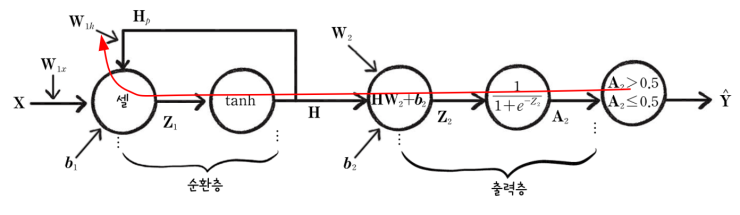

$\frac{\partial \mathbf{L}}{\partial \mathbf{W}_{1h}} = \frac{\partial \mathbf{L}}{\partial\mathbf{Z}_2}\frac{\partial \mathbf{Z}_2}{\partial\mathbf{H}}\frac{\partial \mathbf{H}}{\partial\mathbf{Z}_1}\frac{\partial \mathbf{Z}_1}{\partial\mathbf{W}_{1h}}$

<br>

$\frac{\partial \mathbf{Z}_2}{\partial \mathbf{H}} =\frac{\partial}{\partial \mathbf{H}}(\mathbf{HW}_2+\pmb{b}_2)=\mathbf{W}_2$

-------------

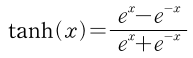

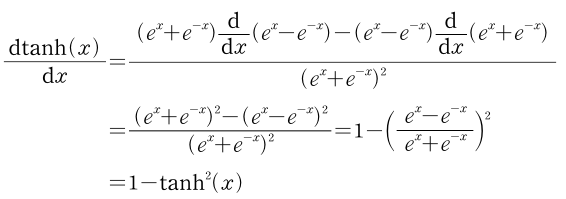

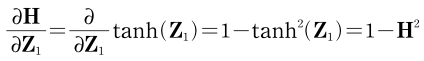

------------

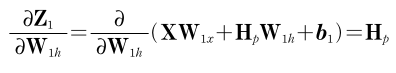

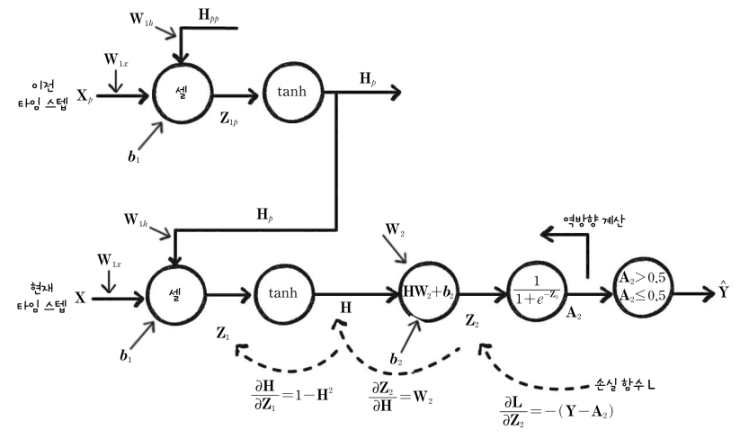

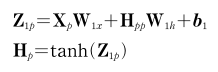

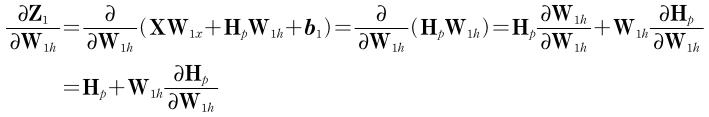

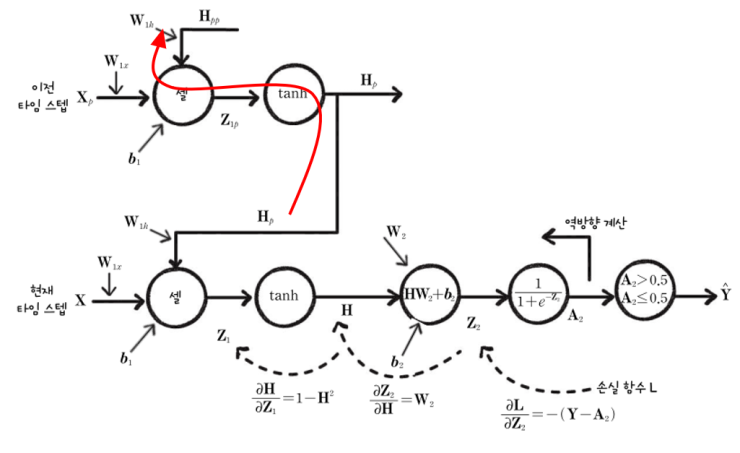

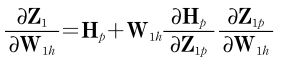

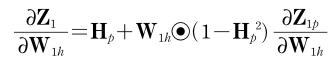

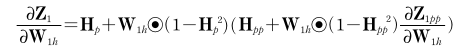

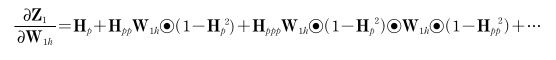

------------------------

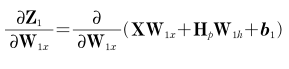

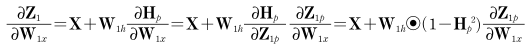

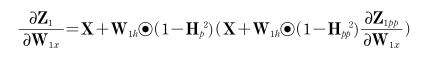

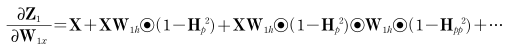

----------


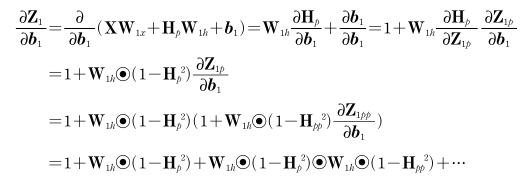

# 09-2 순환 신경망을 만들고 텍스트를 분류하자.

### 1. 텐서플로에서 IMDB 데이터 세트 불러오기

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

17464789/17464789 [==============================] - 0s 0us/step


load_data() 함수에서 skip_top 매개변수에는 가장 많이 등장한 단어들 중 건너뛸 단어의 개수를 지정할 수 있다. num_words 매개변수는 훈련에 사용할 단어의 개수를 정한다.

### 2. 훈련 세트의 크기 확인

In [2]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


### 3. 훈련 세트의 샘플 확인하기

훈련 세트의 샘플을 확인해 보면 영단어가 아니라 정수가 나타난다. 이 정수들은 영단어를 고유한 정수에 일대일 대응한 것으로, BoW(Bag ow Word) 혹은 어휘 사전이라고 부른다. 숫자 2는 어휘사전에 없는 단어를 의미한다.

In [3]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


### 4. 훈련 세트에서 2 제외하기.

추가로 0과 1은 각각 패딩과 글의 시작을 나타내는데 사용한다.

In [4]:
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w != 2]
print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


### 5. 어휘 사전 내려받기

In [5]:
word_to_index = imdb.get_word_index()
word_to_index['movie']

1641221/1641221 [==============================] - 0s 0us/step


17

### 6. 훈련 세트의 정수를 영단어로 변환하기

훈련 세트에 있는 정수는 3 이상부터 영단어를 의미. 3을 뺀 값을 어휘 사전의 인덱스로 사용

In [6]:
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w - 3], end = '')

filmjuststoryreallytheyyoujustthereanfromsotherefilmfilmweregreatjustsomuchfilmwouldreallyatsoyouwhattheyifyouatfilmhavebeengoodalsotheywerejustareoutbecausethemalluparefilmbutarebewhattheyhavedon'tyoustorysobecauseallall

### 7. 훈련 샘플의 길이 확인하기

In [7]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


### 8. 훈련 세트의 타깃 데이터 확인하기

In [8]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


### 9. 검증 세트를 준비

In [9]:
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

## 샘플의 길이 맞추기

일정한 길이가 넘으면 샘플을 잘라버리고 길이가 모자라면 0으로 채운다. 그리고 0은 샘플의 왼쪽에 추가한다. 오른쪽에 추가하면 순환 신경망에 주입될 때 0이 마지막에 주입되어 성능이 좋지 않을 것이다.

### 1. 텐서플로로 샘플의 길이 맞추기

In [10]:
from tensorflow.keras.preprocessing import sequence
maxlen=100
x_train_seq= sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

### 2. 길이를 조정한 훈련 세트의 크기와 샘플 확인하기

In [11]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [12]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


## 샘플을 원-핫 인코딩하기

### 1. 텐서플로로 원-핫 인코딩하기

In [13]:
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

### 2. 원-핫 인코딩으로 변환된 변수 x_train_onehot의 크기를 확인해보자.

In [14]:
print(x_train_onehot.shape)

(20000, 100, 100)


### 3. 샘플을 100개의 단어로 제한 했지만 크기를 확인해보면 760MB에 다다른다. 훈련에 사용할 단어의 개수가 늘어나면 컴퓨터의 메모리가 더 필요하다.

In [15]:
print(x_train_onehot.nbytes)

800000000


## 순환 신경망 클래스 구현하기

### 1. \__init__ 메서드 수정하기

\__init__() 메서드는 은닉층의 개수 대신 셀 개수를 입력 받는다.

In [16]:
def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
  self.n_cells = n_cells          # 셀 개수
  self.batch_size = batch_size    # 배치 크기
  self.w1h = None                 # 은닉 상태에 대한 가중치
  self.w1x = None                 # 입력에 대한 가중치
  self.b1 = None                  # 순환층의 절편
  self.w2 = None                  # 출력층의 가중치
  self.b2 = None                  # 출력층의 절편
  self.h = None                   # 순환층의 활성화 출력
  self.losses = []                # 훈련 손실
  self.val_losses = []            # 검증 손실
  self.lr = learning_rate         # 학습률

### 2. 직교 행렬 방식으로 가중치 초기화

글로럿 초기화 방식으로 가중치를 초기화하며 가중치 초기화의 중요성을 설명했다. 순환 신경망에서는 직교 행렬 초기화(orthogonal initialization)를 사용한다. 직교 행렬 초기화는 순환 셀에서 은닉 상태를 위한 가중치가 반복해서 곱해질 때 너무 커지거나 작아지지 않도록 만들어진다.

In [17]:
def init_weights(self, n_features, n_classes):
  orth_init = tf.initializers.Orthogonal()
  glorot_init = tf.initializers.GlorotUniform()


  self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
  self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
  self.b1 = np.zeros(self.n_cells).astype(np.float32)        # 은닉층의 크기
  self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   # (셀 개수, 클래스 개수)
  self.b2 = np.zeros(n_classes)

### 3. 정방향 계산 구현하기

정방향 계산을 forpass() 메서드에 구현하자.

In [18]:
def forpass(self, x):
  self.h = [np.zeros((x.shape[0], self.n_cells))] # 은닉상태 초기화
  ...

### 4. 넘파이의 swapaxes() 함수를 사용하여 입력 x의 첫 번째 배치 차원과 두 번째 타임 스텝 차원을 바꾼다.

In [19]:
...
# 배치 차원과 타임 스텝 차원을 바꾼다.
seq = np.swapaxes(x, 0, 1)
...

NameError: name 'x' is not defined

입력 x는 여러 개의 샘플이 담긴 미니 배치이다. 정방향 계산을 할 때는 한 샘플의 모든 타임 스텝을 처리하고 그 다음에 샘플을 처리하는 방식이 아니다. 미니 배치 안에 있는 모든 샘플의 첫 번째 타임 스텝을 한 번에 처리하고 두 번째 타임 스텝을 한 번에 처리해야 한다. 이를 손쉽게 구현하기 위해 배치 차원과 타임 스텝 차원을 바꾼 것이다.

### 5. 마지막으로 각 샘플의 모든 타임 스텝에 대한 정방향 계산을 수행한다.

In [20]:
...
# 순환층의 선형식을 계산

for x in seq:
  z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
  h = np.tanh(z1)                                     # 활성화 함수를 적용
  self.h.append(h)                                    # 역전파를 위해 은닉 상태를 저장
  z2 = np.dot(h, self.w2) + self.b2                   # 츨력층의 선형식을 계산
return z2

NameError: name 'seq' is not defined

### 6. 역방향 계산 구현

In [ ]:
def backprop(self, x, err):
  m = len(x)    # 샘플 개수

  # 출력층의 가중치와 절편에 대한 그레이디언트를 계산
  w2_grad = np.dot(self.h[-1].T, err) / m
  b2_grad = np.sum(err) / m
  # 배치 차원과 타임 스텝 차원을 바꾼다
  seq = np.swapaxes(x, 0, 1)


  w1h_grad = w1x_grad = b2_grad = 0
  # 셀 직전까지 그레이디언트를 계산
  err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
  # 모든 타임 스텝을 거슬러 가면서 그레이디언트를 전파.
  for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
    w1h_grad += np.dot(h.T, err_to_cell)
    w1x_grad += np.dot(x.T, err_to_cell)
    b1_grad += np.sum(err_to_cell, axis=0)
   # 이전 타임 스텝의 셀 직전까지 그레이디언트를 계산
    err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
  w1h_grad /= m
  w1x_grad /= m
  b1_grad /= m

  return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

### 7. 나머지 메서드 수정

In [21]:
class RecurrentNetwork:

    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells     # 셀 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1h = None            # 은닉 상태에 대한 가중치
        self.w1x = None            # 입력에 대한 가중치
        self.b1 = None             # 순환층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.h = None              # 순환층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   # 은닉 상태를 초기화합니다.
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        # 순환 층의 선형 식을 계산합니다.
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    # 활성화 함수를 적용합니다.
            self.h.append(h)                   # 역전파를 위해 은닉 상태 저장합니다.
            z2 = np.dot(h, self.w2) + self.b2  # 출력층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수

        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)

        w1h_grad = w1x_grad = b1_grad = 0
        # 셀 직전까지 그래디언트를 계산합니다.
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 모든 타임 스텝을 거슬러가면서 그래디언트를 전파합니다.
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # 이전 타임 스텝의 셀 직전까지 그래디언트를 계산합니다.
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)

        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m

        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a

    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()

        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)                           # 은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   # (셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.

    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 셀의 가중치와 절편을 업데이트합니다.
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a

    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return z > 0                 # 스텝 함수를 적용합니다.

    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

## 순환 신경망 모델 훈련 시키기

### 1. 순환 신경망 모델 훈련시키기

셀 개수 32개, 배치 크기는 32개, 학습률은 0.01, 에포크 횟수는 20을 사용한다.

In [23]:
import tensorflow as tf

rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, epochs=20, x_val = x_val_onehot, y_val = y_val)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

### 2. 훈련 검증 세트에 대한 손실 그래프 그리기


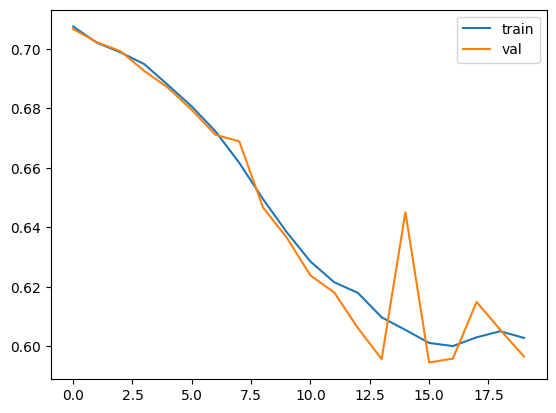

In [24]:
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.legend(['train', 'val'])
plt.show()

### 3. 검증 세트 정확도 평가하기

In [25]:
rn.score(x_val_onehot, y_val)

0.6752

# 09-3 텐서플로로 순환 신경망 만들기

## SimpleRNN 클래스로 순환 신경망 만들기

### 1. 순환 신경망에 필요한 클래스 임포트하기


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### 2. 모델 만들기

In [34]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(None, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. 모델 컴파일 하고 훈련시키기

In [35]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 14s 20ms/step - loss: 0.7034 - accuracy: 0.5159 - val_loss: 0.6884 - val_accuracy: 0.5524
Epoch 2/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6907 - accuracy: 0.5419 - val_loss: 0.6920 - val_accuracy: 0.5238
Epoch 3/20
625/625 [==============================] - 12s 20ms/step - loss: 0.6912 - accuracy: 0.5267 - val_loss: 0.6882 - val_accuracy: 0.5384
Epoch 4/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6842 - accuracy: 0.5543 - val_loss: 0.6796 - val_accuracy: 0.5678
Epoch 5/20
625/625 [==============================] - 13s 21ms/step - loss: 0.6778 - accuracy: 0.5738 - val_loss: 0.6700 - val_accuracy: 0.5934
Epoch 6/20
625/625 [==============================] - 13s 21ms/step - loss: 0.6854 - accuracy: 0.5500 - val_loss: 0.6777 - val_accuracy: 0.5780
Epoch 7/20
625/625 [==============================] - 13s 20ms/step - loss: 0.6745 - accuracy: 0.5743 - val_loss: 0.6617 - val_accuracy:

### 4. 훈련, 검증 세트에 대한 손실 그래프와 정확도 그래프 그리기

<function matplotlib.pyplot.show(close=None, block=None)>

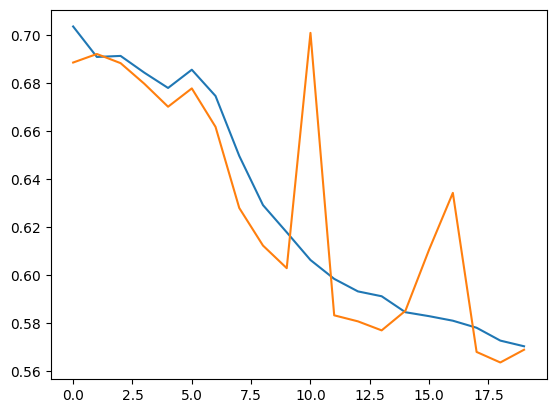

In [38]:
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

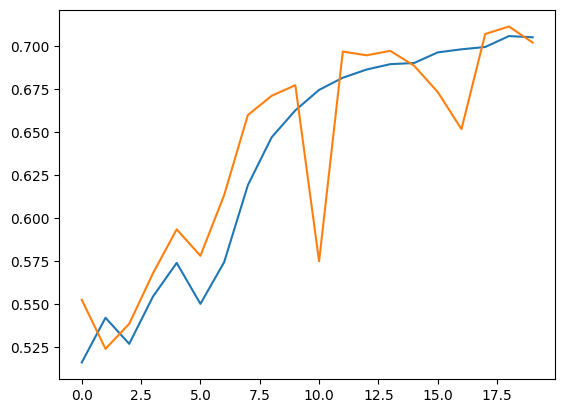

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

### 5. 검증세트 정확도 평가하기

In [42]:
loss, accuracy = model.evaluate(x_val_onehot, y_val)
print(accuracy)

157/157 [==============================] - 1s 8ms/step - loss: 0.5690 - accuracy: 0.7022
0.7021999955177307


흠...성능이 별로...

## 임베딩층으로 순환 신경망 모델 성능 높이

앞에서 만들었던 순환 신경망의 가장 큰 단점 중 하나는 텍스트 데이터를 원 - 핫 인코딩으로 전처리 한다는 것이다. 원-핫 인코딩을 사용하면 입력 데이터 크기와 사용할 수 있는 영단어의 수가 제한된다는 문제가 있다. 또 원-핫 인코딩은 '단어 사이에는 관련이 전혀 없다'는 가정이 전제되어야 한다. 이러한 문제를 해결하기 위해 고안된 것이 **단어 임베딩(word embedding)**이다. 단어 임베딩은 다음과 같이 단어를 고정된 길이의 실수 벡터로 임베딩한다.

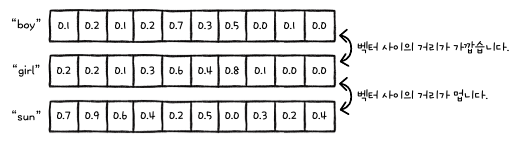

### 1. Embedding 클래스 임포트하기

In [45]:
from tensorflow.keras.layers import Embedding

### 2. 훈련 데이터 준비하기

In [47]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top = 20, num_words = 100)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

### 3. 샘플 길이 맞추기

In [48]:
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen = maxlen)

### 4. 모델 만들기

원 - 핫 인코딩된 입력 벡터의 길이는 100이었지만 단어 임베딩에서는 길이를 32로 줄이자. Embedding 클래스에 입력한 매개변수는 단어 개수와 출력 길이다.

In [54]:
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation = 'sigmoid'))

model_ebd.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 8)                 328       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32337 (126.32 KB)
Trainable params: 32337 (126.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5. 모델 컴파일하고 훈련시키기

In [55]:
model_ebd.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs = 10, batch_size = 32, validation_data = (x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 16s 23ms/step - loss: 0.6048 - accuracy: 0.6727 - val_loss: 0.6146 - val_accuracy: 0.6614
Epoch 2/10
625/625 [==============================] - 14s 23ms/step - loss: 0.5856 - accuracy: 0.6889 - val_loss: 0.5842 - val_accuracy: 0.6986
Epoch 3/10
625/625 [==============================] - 14s 23ms/step - loss: 0.5762 - accuracy: 0.7003 - val_loss: 0.5873 - val_accuracy: 0.6932
Epoch 4/10
625/625 [==============================] - 14s 23ms/step - loss: 0.5715 - accuracy: 0.7038 - val_loss: 0.5798 - val_accuracy: 0.6994
Epoch 5/10
625/625 [==============================] - 14s 23ms/step - loss: 0.5626 - accuracy: 0.7101 - val_loss: 0.5715 - val_accuracy: 0.7058
Epoch 6/10
625/625 [==============================] - 14s 23ms/step - loss: 0.5583 - accuracy: 0.7157 - val_loss: 0.5687 - val_accuracy: 0.7134
Epoch 7/10
625/625 [==============================] - 16s 25ms/step - loss: 0.5539 - accuracy: 0.7198 - val_loss: 0.5666 - val_accuracy:

### 6. 손실 그래프와 정확도 그래프 그리기

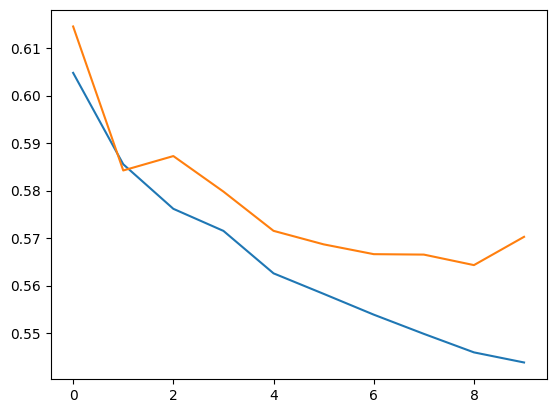

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

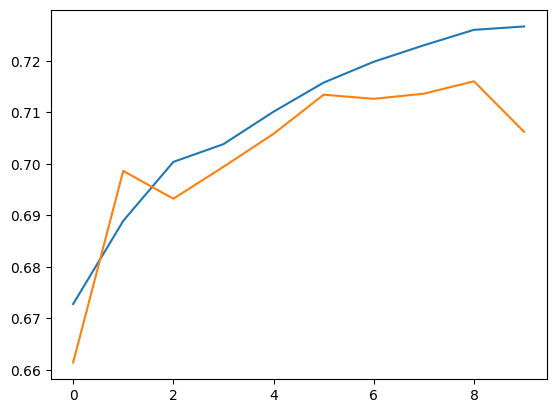

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

### 7. 검증 세트 정확도 평가하기

In [59]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.7062000036239624


# 09 - 4 LSTM 순환 신경망을 만들고 텍스트를 분류한다.

좀 더 긴 타임 스텝의 데이터를 처리하는 LSTM(Long Short - Term Memory) 순환 신경망을 사용한다. 그레이디언트 소실(vanishing gradient) 문제를 극복하여 긴 시퀀스를 성공적으로 모델링 할 수 있다.

## LSTM 셀의 구조를 알아보자

기본 순환 신경망과 달리 LSTM 셀은 2개의 출력이 순환된다. 그중 하나만 다음층으로 전달된다. 셀로 순환만 되는 출력을 셀 상태(C)라고 부른다.

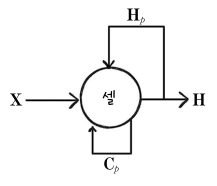

셀을 확대해보자.

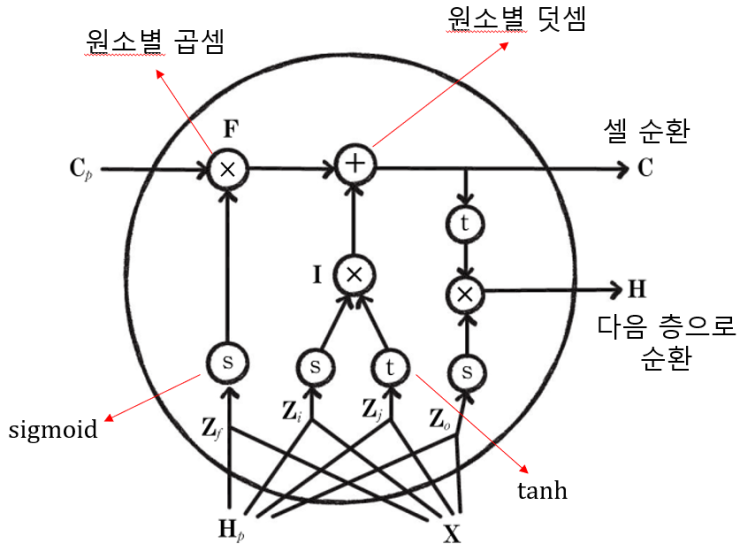

s = 시그모이드 활성화 함수
t = tanh 활성화 함수
x = 원소별 곱셈
+ = 원소별 덧셈

$Z_f = XW_{xf} + H_pW_{hf}+b_f$

Z_i, Z_j, Z_o도 동일한 방식으로 계산하지만 모두 다른 가중치를 사용한다.
계산된 Z는 이후 어떻게 될까? 먼저 Z_f에 시그모이드 함수를 적용한 다음 이전 타임 스텝의 셀 상태에 C_p와 요소별 곱셈하여 F를 만든다. Z_i 와  Z_j에 시그모이드 함수와 tanh 함수를 각각 적용한 다음 요소별 곱셈하여 I를 계산한다. 이렇게 구한 F와 I를 더하여 새로운 셀 상태 C를 만든다. 마지막으로 새로운 은닉 상태 H는 새로운 셀 상태 C에 tanh 함수를 적용하고 Z_o에 시그모이드 함수를 적용한 다음 요소별 솝셈하여 만든다. 이 과정을 나타내는 전체 공식은 아래와 같다.

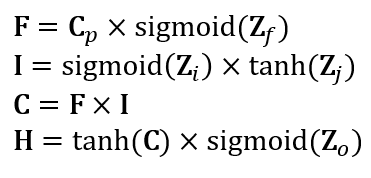

* F를 계산하는 식은 이전 상태의 내용을 삭제하는 역할을 해서 삭제 게이트(forget gate)라고 한다.
* I를 계산하는 식은 새로운 정보를 추가하는 역할을 해서 입력 게이트(input gate)라고 한다.
* H를 계산하는 식은 출력 게이트 (output gate)라고 한다.

위 게이트의 역할은 데이터 세트나 항에 따라 달라질 수도 있다.

## 텐서플로로 LSTM 순환 신경망 만들기

### 1. LSTM 순환 신경망 만들기

In [67]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          32000     
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33321 (130.16 KB)
Trainable params: 33321 (130.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2. 모델 훈련하기

In [64]:
model_lstm.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32,
                         validation_data = (x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 23s 34ms/step - loss: 0.5894 - accuracy: 0.6884 - val_loss: 0.5610 - val_accuracy: 0.7166
Epoch 2/10
625/625 [==============================] - 19s 30ms/step - loss: 0.5507 - accuracy: 0.7168 - val_loss: 0.5546 - val_accuracy: 0.7114
Epoch 3/10
625/625 [==============================] - 20s 32ms/step - loss: 0.5447 - accuracy: 0.7212 - val_loss: 0.5446 - val_accuracy: 0.7254
Epoch 4/10
625/625 [==============================] - 19s 31ms/step - loss: 0.5402 - accuracy: 0.7243 - val_loss: 0.5418 - val_accuracy: 0.7260
Epoch 5/10
625/625 [==============================] - 19s 30ms/step - loss: 0.5364 - accuracy: 0.7264 - val_loss: 0.5427 - val_accuracy: 0.7232
Epoch 6/10
625/625 [==============================] - 20s 32ms/step - loss: 0.5344 - accuracy: 0.7293 - val_loss: 0.5382 - val_accuracy: 0.7234
Epoch 7/10
625/625 [==============================] - 19s 30ms/step - loss: 0.5325 - accuracy: 0.7301 - val_loss: 0.5383 - val_accuracy:

### 손실 그래프와 정확도 그래프 그리기

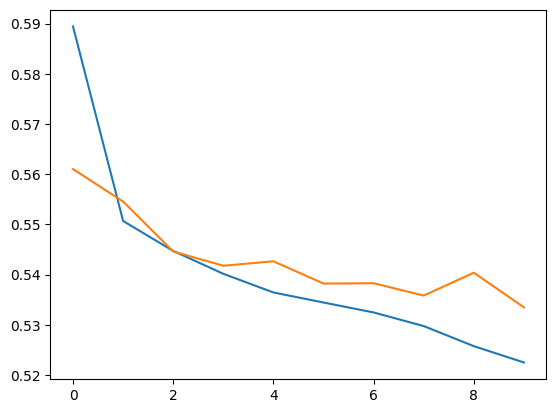

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

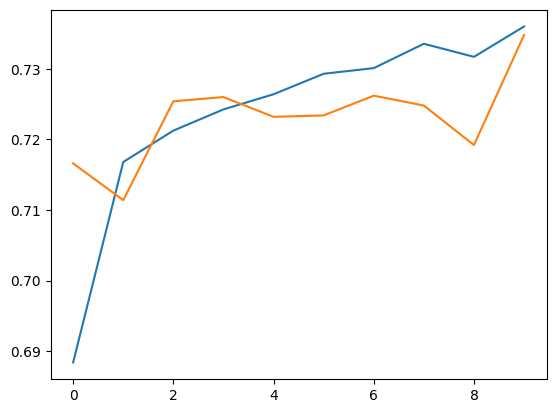

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()